#Data Description

When it comes to efficient building design, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. In order to estimate the required cooling and heating capacities, architects and building desioners need information about the characteristics of the building and of the conditioned space (for example occupancy and activity level). For this reason the dataset consists of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.

The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can be used as a multi-class classification problem if the response is rounded to the nearest integer. This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters
Energy analysis using 12 different building shapes simulated in Ecotect has been performed. 
The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. 
It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

*   X1 Relative Compactness
*   X2 Surface Area
*   X3 Wall Area
*   X4 Roof Area
*   X5 Overall Height
*   X6 Orientation
*   X7 Glazing Area
*   X8 Glazing Area Distribution
*   y1 Heating Load
*   y2 Cooling Load

# Import Libraries

In [0]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

#Import Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read the dataset using pandas library
dataset=pd.read_excel('/content/drive/My Drive/Colab Notebooks/EE 257 Project/ENB2012_data.xlsx')
print('Dataset is as represented:\n')
dataset

Dataset is as represented:



,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [0]:
#Changing Column names
dataset=dataset.rename(columns={'X1': 'Relative Compactness','X2': 'Surface Area','X3': 
                        'Wall Area','X4': 'Roof Area','X5':'Overall Height',
                        'X6': 'Orientation','X7': 'Glazing Area','X8':'Glazing Area Distribution',
                        'Y1': 'Heating Load','Y2':'Cooling Load'})

In [9]:
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [10]:
#Round Off the Labels
dataset['Cooling Load']=round(dataset['Cooling Load']).astype(int)
dataset['Heating Load']=round(dataset['Heating Load']).astype(int)
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,16,21
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,16,21
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,16,21
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,16,21
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,21,28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,18,21
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,17,17
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16,17
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16,17


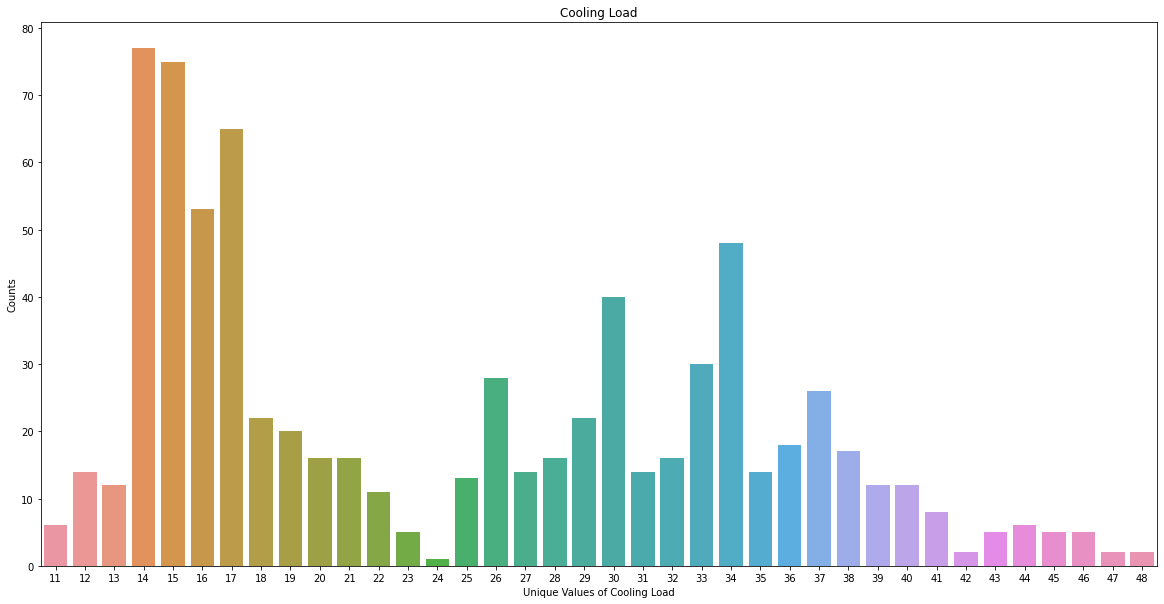

In [11]:
#Representing Counts of Cooling Load label
(unique_c,count_c)=np.unique(dataset['Cooling Load'],return_counts=True)
plt.figure(figsize=(20,10))
sns.barplot(unique_c,count_c)
plt.xlabel('Unique Values of Cooling Load')
plt.ylabel('Counts')
plt.title('Cooling Load')
plt.show()

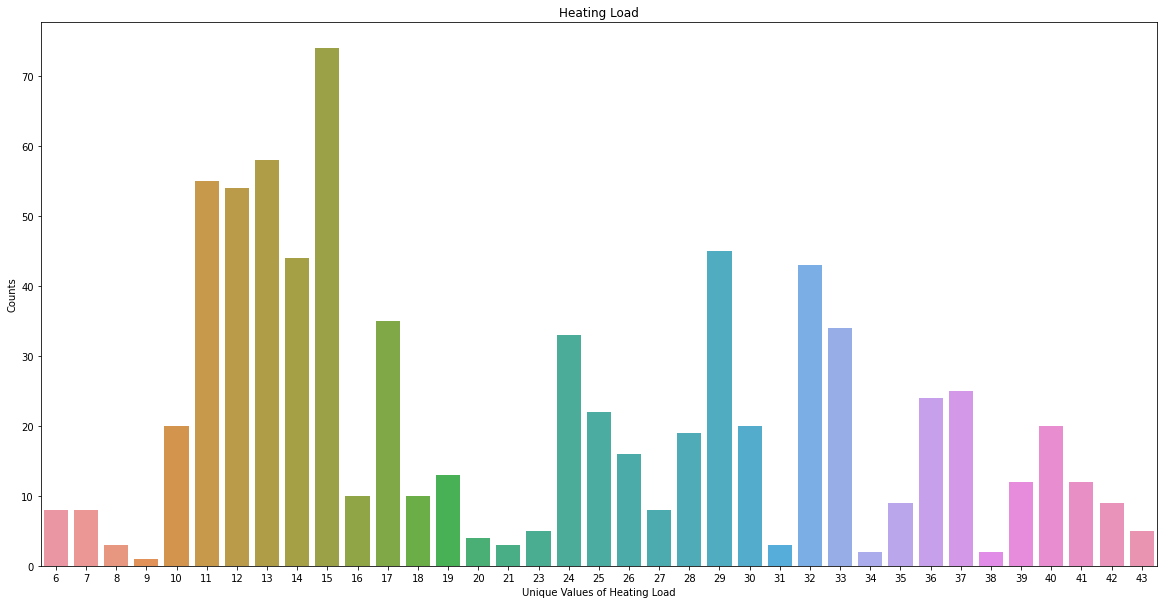

In [12]:
  #Representing Counts of Heating Load label
(unique_h,count_h)=np.unique(dataset['Heating Load'],return_counts=True)
plt.figure(figsize=(20,10))
sns.barplot(unique_h,count_h)
plt.xlabel('Unique Values of Heating Load')
plt.ylabel('Counts')
plt.title('Heating Load')
plt.show()

In [13]:
#Input shape
dataset.shape

(768, 10)

In [14]:
#Converting labels to class to convert regression to classificaiton problem
for i in range(dataset.shape[0]):
  if dataset['Heating Load'][i]<=10:
    dataset['Heating Load'][i]='Class 0'
  elif dataset['Heating Load'][i]<=15:
    dataset['Heating Load'][i]='Class 1'
  elif dataset['Heating Load'][i]<=20:
    dataset['Heating Load'][i]='Class 2'
  elif dataset['Heating Load'][i]<=25:
    dataset['Heating Load'][i]='Class 3'
  elif dataset['Heating Load'][i]<=30:
    dataset['Heating Load'][i]='Class 4'
  elif dataset['Heating Load'][i]<=35:
    dataset['Heating Load'][i]='Class 5'
  elif dataset['Heating Load'][i]<=40:
    dataset['Heating Load'][i]='Class 6'
  elif dataset['Heating Load'][i]<=45:
    dataset['Heating Load'][i]='Class 7'
  else:
    dataset['Heating Load'][i]='Class 8'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

In [15]:
#Converting labels to class to convert regression to classificaiton problem

for i in range(dataset.shape[0]):
  if dataset['Cooling Load'][i]<=10:
    dataset['Cooling Load'][i]='Class 0'
  elif dataset['Cooling Load'][i]<=15:
    dataset['Cooling Load'][i]='Class 1'
  elif dataset['Cooling Load'][i]<=20:
    dataset['Cooling Load'][i]='Class 2'
  elif dataset['Cooling Load'][i]<=25:
    dataset['Cooling Load'][i]='Class 3'
  elif dataset['Cooling Load'][i]<=30:
    dataset['Cooling Load'][i]='Class 4'
  elif dataset['Cooling Load'][i]<=35:
    dataset['Cooling Load'][i]='Class 5'
  elif dataset['Cooling Load'][i]<=40:
    dataset['Cooling Load'][i]='Class 6'
  elif dataset['Cooling Load'][i]<=45:
    dataset['Cooling Load'][i]='Class 7'
  else:
    dataset['Cooling Load'][i]='Class 8'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del 

In [16]:
#Dataset representation
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Class 2,Class 3
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Class 2,Class 3
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Class 2,Class 3
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Class 2,Class 3
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Class 3,Class 4
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,Class 2,Class 3
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,Class 2,Class 2
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,Class 2,Class 2
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,Class 2,Class 2


In [17]:
#Defining features
features=dataset.drop(['Heating Load','Cooling Load'],axis=1)
print('Features are as below: \n')
features

Features are as below: 



,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [18]:
#Defining Labels
labels=dataset[['Heating Load','Cooling Load']]
print('Labels are represent as below:\n')
labels

Labels are represent as below:



,Heating Load,Cooling Load
0,Class 2,Class 3
1,Class 2,Class 3
2,Class 2,Class 3
3,Class 2,Class 3
4,Class 3,Class 4
...,...,...
763,Class 2,Class 3
764,Class 2,Class 2
765,Class 2,Class 2
766,Class 2,Class 2


As the dataset consists of lots of values, hence we have to further divide and define each class based on ranges. 
Each class is defined based on range 5-50 as class 0 represent 5-10, class 1 represents 11-15 and so on.

# Data Visualization

In [19]:
#Dataset heading
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,Class 2,Class 3
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,Class 2,Class 3
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,Class 2,Class 3
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,Class 2,Class 3
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,Class 3,Class 4


In [20]:
#Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    object 
 9   Cooling Load               768 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 60.1+ KB


No missing value found in the dataset

In [21]:
#Statistics of the dataset
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


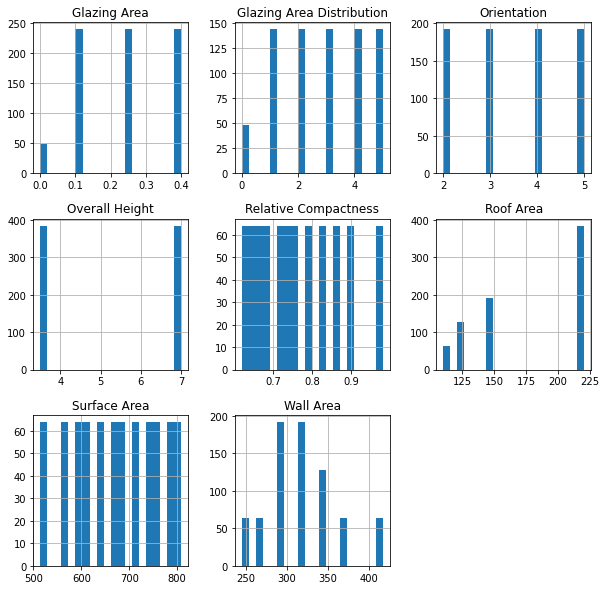

In [22]:
#Input features histogram
%matplotlib inline
features.hist(bins=20,figsize=(10,10))
plt.show()

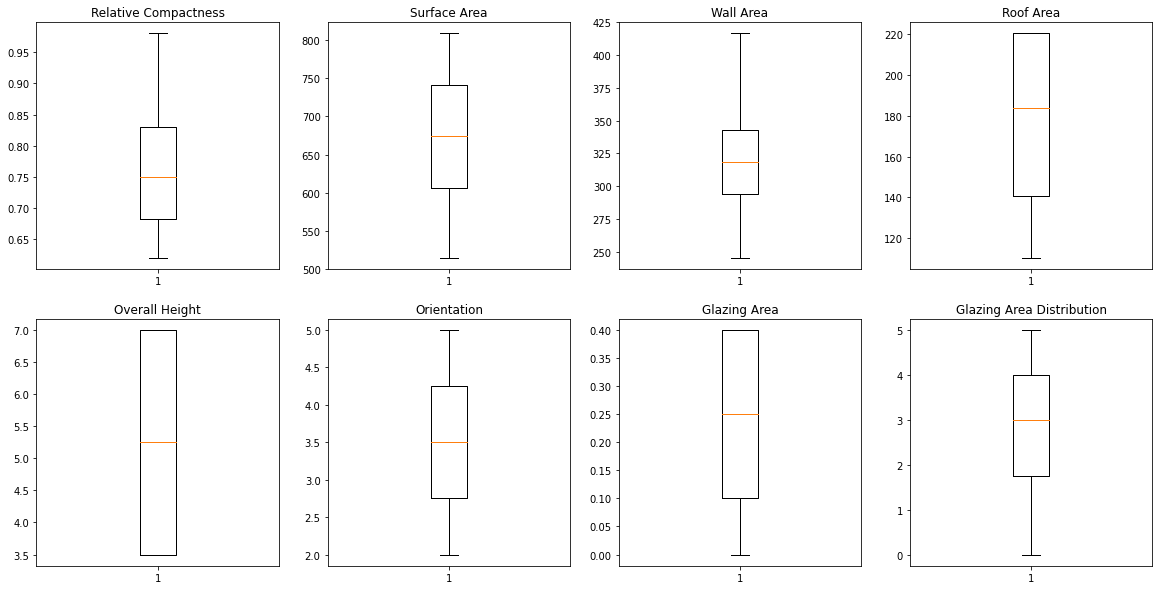

In [23]:
#Box Plot Features
fig1, ax = plt.subplots(2,4,figsize=(20,10))
ax[0,0].boxplot(features['Relative Compactness'])
ax[0,0].set_title('Relative Compactness')

ax[0,1].boxplot(features['Surface Area'])
ax[0,1].set_title('Surface Area')

ax[0,2].boxplot(features['Wall Area'])
ax[0,2].set_title('Wall Area')

ax[0,3].boxplot(features['Roof Area'])
ax[0,3].set_title('Roof Area')

ax[1,0].boxplot(features['Overall Height'])
ax[1,0].set_title('Overall Height')

ax[1,1].boxplot(features['Orientation'])
ax[1,1].set_title('Orientation')

ax[1,2].boxplot(features['Glazing Area'])
ax[1,2].set_title('Glazing Area')

ax[1,3].boxplot(features['Glazing Area Distribution'])
ax[1,3].set_title('Glazing Area Distribution')

plt.show()

Based on Box plot it could be judged that there are no outliers in the dataset

In [24]:
#Feature Correlation
dataset.corr().astype('float16')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Relative Compactness,1.000000,-0.991699,-0.203735,-0.868652,0.827637,0.0,0.000000,0.000000
Surface Area,-0.991699,1.000000,0.195557,0.880859,-0.857910,0.0,0.000000,-0.000000
Wall Area,-0.203735,0.195557,1.000000,-0.292236,0.281006,0.0,-0.000000,0.000000
Roof Area,-0.868652,0.880859,-0.292236,1.000000,-0.972656,0.0,-0.000000,-0.000000
Overall Height,0.827637,-0.857910,0.281006,-0.972656,1.000000,0.0,0.000000,0.000000
Orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
Glazing Area,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.0,1.000000,0.213013
Glazing Area Distribution,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.0,0.213013,1.000000


Glazing Area Distribution, Orientation & Glazing Area are uncorrelated data and does not depend on any feature.

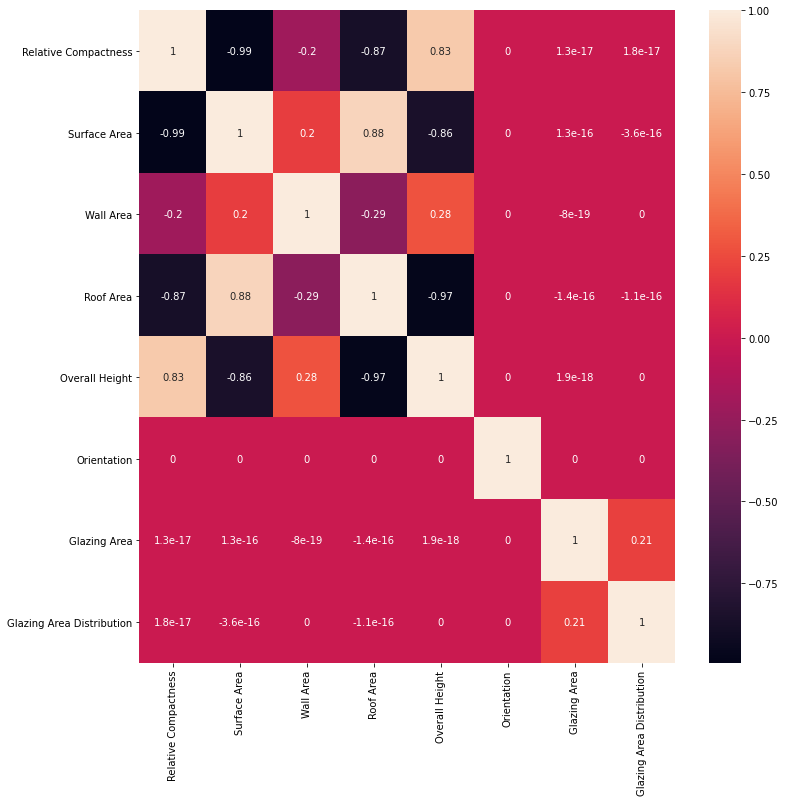

In [25]:
# Preview correlation
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True)

In [26]:
# Change number format in correlations
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
dataset.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Relative Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00
Surface Area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00
Wall Area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00
Roof Area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00
Overall Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00
Orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
Glazing Area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21
Glazing Area Distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00


<Figure size 14400x14400 with 0 Axes>

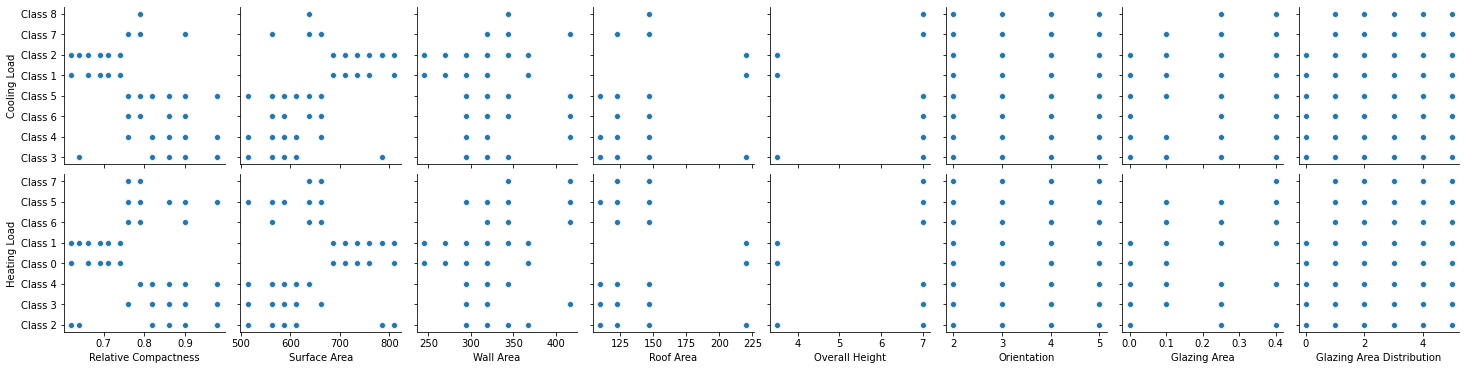

In [27]:
# Correlation between inputs and outputs
plt.figure(figsize=(200,200))
sns.pairplot(data=dataset, y_vars=['Cooling Load','Heating Load'],
             x_vars=['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 
                     'Overall Height','Orientation', 'Glazing Area', 'Glazing Area Distribution',])
plt.show()

From the table, we can see some information about correlations between all variables. For example, the overall_height (an input) has a strong correlation (0.90) with the output - cooling_load. Besides, the pairplot depicts the the relationship between them. For the overall_height and cooling_load plot, there is only 2 values of overall height due to the distribution and made us difficult to see the linear correlations of those variables. We will use preprocessing method to refine the distributions.

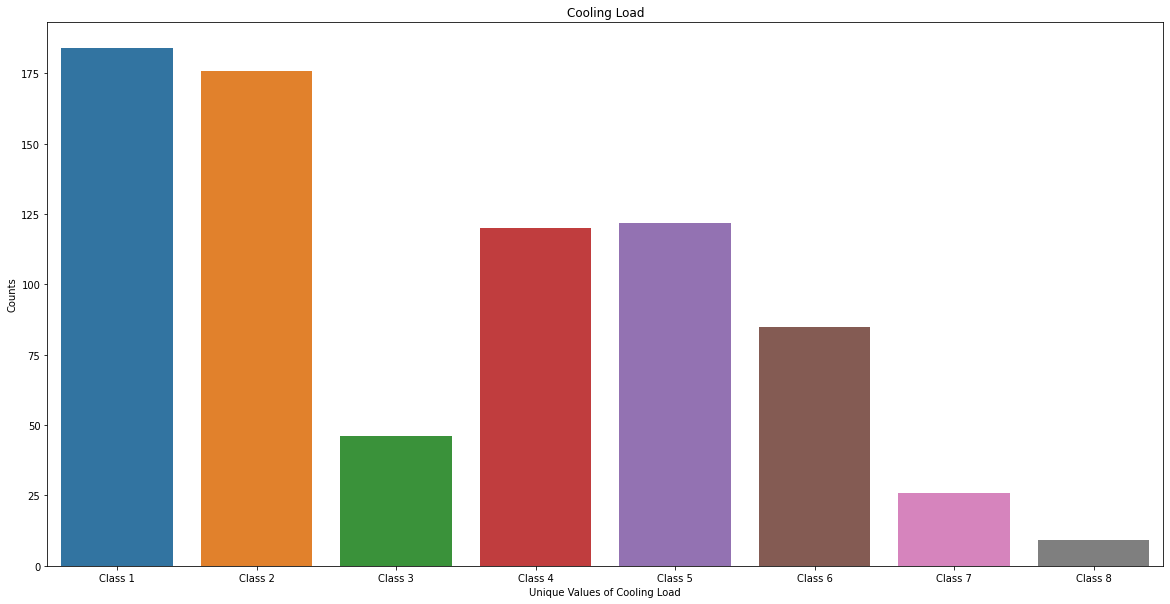

In [28]:
#Count the number of classes in Cooling Load 
(unique_c,count_c)=np.unique(labels['Cooling Load'],return_counts=True)
plt.figure(figsize=(20,10))
sns.barplot(unique_c,count_c)
plt.xlabel('Unique Values of Cooling Load')
plt.ylabel('Counts')
plt.title('Cooling Load')
plt.show()

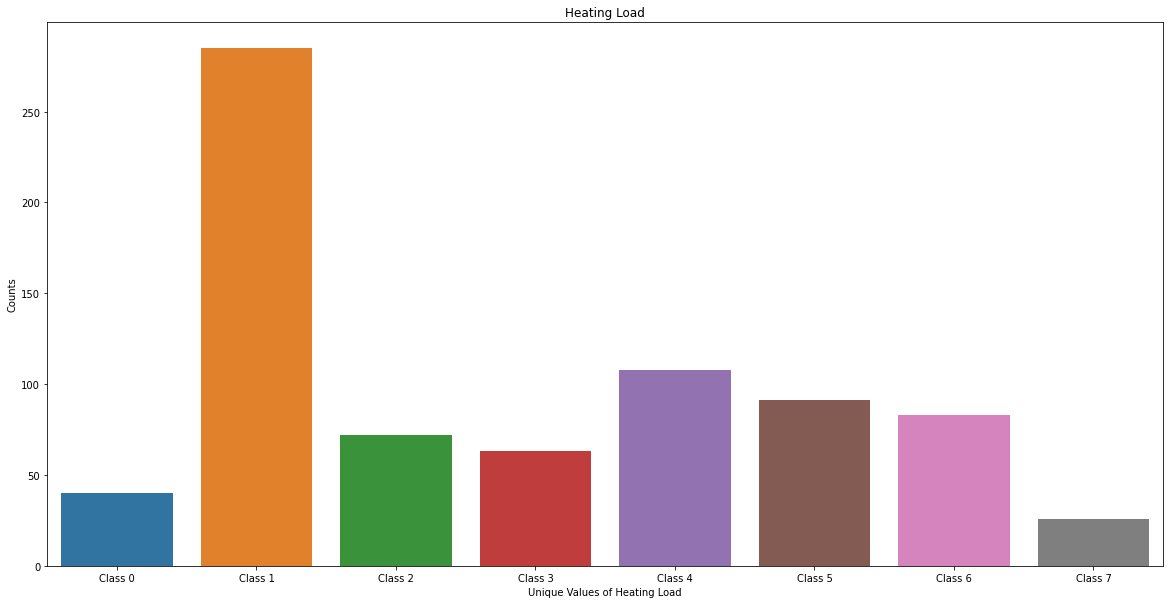

In [29]:
#Count the number of classes in Heating Load 
(unique_h,count_h)=np.unique(labels['Heating Load'],return_counts=True)
plt.figure(figsize=(20,10))
sns.barplot(unique_h,count_h)
plt.xlabel('Unique Values of Heating Load')
plt.ylabel('Counts')
plt.title('Heating Load')
plt.show()

# Model Training Heating Load

## Logistic Regression

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [31]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [34]:
classifier_log_h=LogisticRegression()
classifier_log_h.fit(X_train_scaled,Y_train['Heating Load'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log_h=classifier_log_h.predict(X_test_scaled)

In [36]:
score_log_h=accuracy_score(y_pred_log_h,Y_test['Heating Load'])
print('Performance of Logistic Regression is: ',score_log_h)
score_log_h_n=score_log_h

Performance of Logistic Regression is:  0.564935064935065


In [37]:
cm_log_h = confusion_matrix(Y_test['Heating Load'], y_pred_log_h)
print(cm_log_h)

[[ 6  3  0  0  0  0  0  0]
 [ 1 47  1  0  0  0  0  0]
 [ 0  9  5  3  0  0  0  0]
 [ 0  0  0  4  8  0  1  0]
 [ 0  0  0  7  7  6  3  0]
 [ 0  0  0  2  4  8  4  0]
 [ 0  0  0  5  1  4  9  0]
 [ 0  0  0  0  0  0  5  1]]


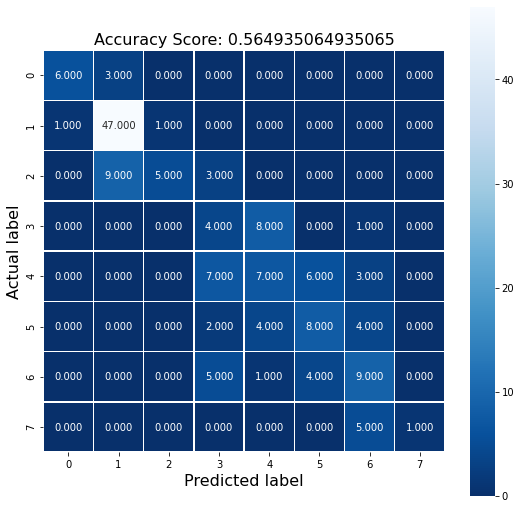

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_log_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_log_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [39]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [40]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_log_h=LogisticRegression()
  classifier_log_h.fit(X_train_scaled,y_train)
  y_pred_log_h=classifier_log_h.predict(X_test_scaled)
  score_log_h=accuracy_score(y_pred_log_h,y_test)
  temp+=score_log_h
  scores.append(temp/features.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


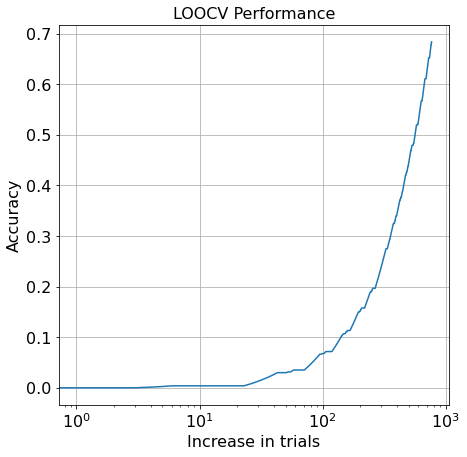

In [41]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [42]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.68359375


In [0]:
scores_log_h_loo=scores[len(scores)-1]

The performance improved from 56% to 68% by using Lease One Out Cross Validation technique

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [45]:
features_updated

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [46]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [47]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_log_h=LogisticRegression()
  classifier_log_h.fit(X_train_scaled,y_train)
  y_pred_log_h=classifier_log_h.predict(X_test_scaled)
  score_log_h=accuracy_score(y_pred_log_h,y_test)
  temp+=score_log_h
  scores.append(temp/features.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


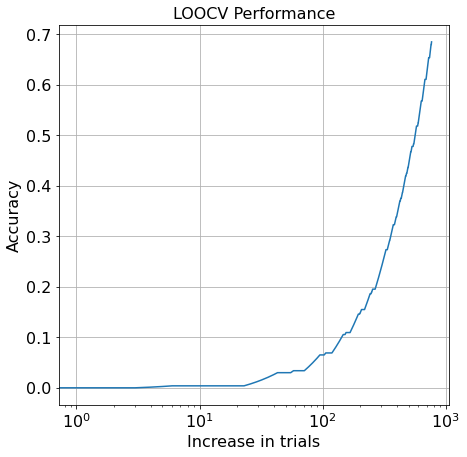

In [48]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [49]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.6848958333333334


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased.

In [0]:
scores_log_h_frloo=scores[len(scores)-1]

#### PCA

In [51]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [53]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [54]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_pca):
  X_train, X_test = features_pca[train_index], features_pca[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_log_h=LogisticRegression()
  classifier_log_h.fit(X_train_scaled,y_train)
  y_pred_log_h=classifier_log_h.predict(X_test_scaled)
  score_log_h=accuracy_score(y_pred_log_h,y_test)
  temp+=score_log_h
  scores.append(temp/features.shape[0])

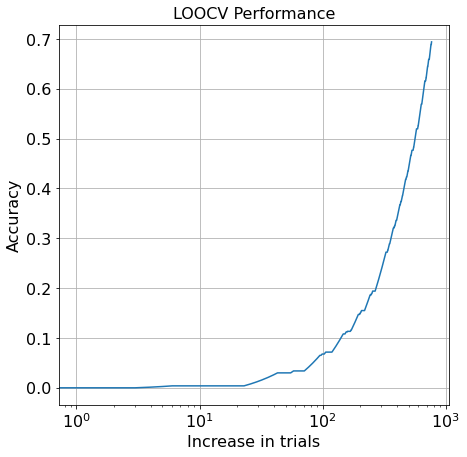

In [56]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [57]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.6940104166666666


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance to 69% from 68%.

In [0]:
scores_log_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_log_h=LogisticRegression()
classifier_log_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_log_h=classifier_log_h.predict(X_test_scaled)
score_log_h=accuracy_score(y_pred_log_h,Y_test['Heating Load'])

In [61]:
cm_log_h = confusion_matrix(Y_test['Heating Load'], y_pred_log_h)
print(cm_log_h)

[[ 7  2  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  8  6  3  0  0  0  0]
 [ 0  0  0  6  6  0  1  0]
 [ 0  0  0  7  7  6  3  0]
 [ 0  0  0  2  4  8  4  0]
 [ 0  0  0  6  0  4  9  0]
 [ 0  0  0  0  0  0  5  1]]


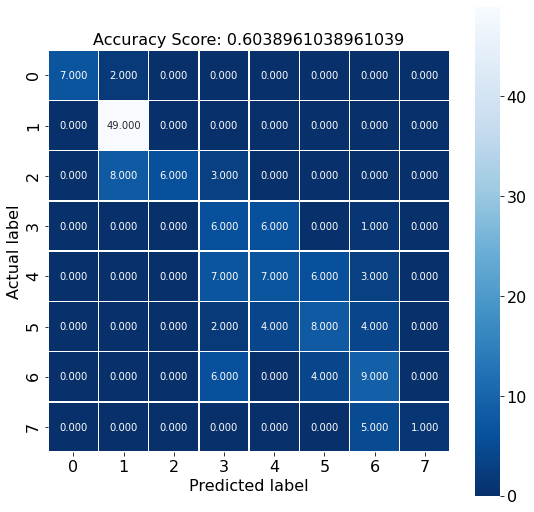

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_log_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_log_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
score_log_h_pca=score_log_h

## QDA

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [65]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [68]:
classifier_qda_h=QuadraticDiscriminantAnalysis()
classifier_qda_h.fit(X_train_scaled,Y_train['Heating Load'])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [0]:
y_pred_qda_h=classifier_qda_h.predict(X_test_scaled)

In [70]:
score_qda_h=accuracy_score(y_pred_qda_h,Y_test['Heating Load'])
print('Performance of QDA Regression is: ',score_qda_h)

Performance of QDA Regression is:  0.3181818181818182


In [0]:
score_qda_h_n=score_qda_h

In [72]:
cm_qda_h = confusion_matrix(Y_test['Heating Load'], y_pred_log_h)
print(cm_qda_h)

[[ 7  2  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  8  6  3  0  0  0  0]
 [ 0  0  0  6  6  0  1  0]
 [ 0  0  0  7  7  6  3  0]
 [ 0  0  0  2  4  8  4  0]
 [ 0  0  0  6  0  4  9  0]
 [ 0  0  0  0  0  0  5  1]]


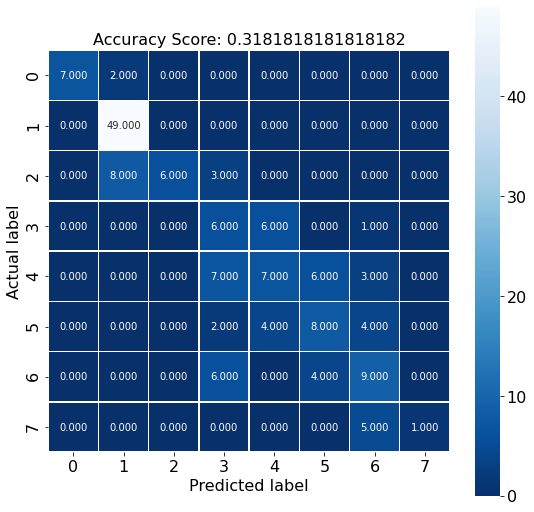

In [73]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_qda_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_qda_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [74]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [75]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_qda_h=QuadraticDiscriminantAnalysis()
  classifier_qda_h.fit(X_train_scaled,y_train)
  y_pred_qda_h=classifier_qda_h.predict(X_test_scaled)
  score_qda_h=accuracy_score(y_pred_qda_h,y_test)
  temp+=score_qda_h
  scores.append(temp/features.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

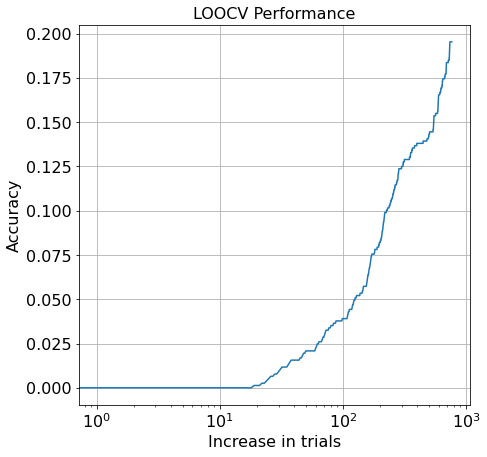

In [76]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [77]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.1953125


The performance degradaed, the model is worst performed with accuracy of 19% which represents that model is not Quadratic in nature.

In [0]:
scores_qda_h_loo=scores[len(scores)-1]

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [80]:
features_updated

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [81]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [82]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_qda_h=QuadraticDiscriminantAnalysis()
  classifier_qda_h.fit(X_train_scaled,y_train)
  y_pred_qda_h=classifier_qda_h.predict(X_test_scaled)
  score_qda_h=accuracy_score(y_pred_qda_h,y_test)
  temp+=score_qda_h
  scores.append(temp/features.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

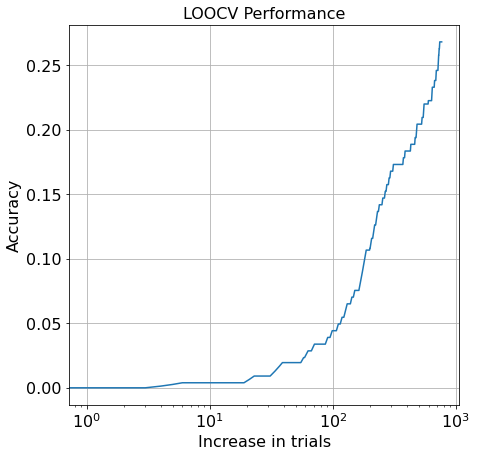

In [83]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [84]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.2682291666666667


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased.

In [0]:
scores_qda_h_frloo=scores[len(scores)-1]

#### PCA

In [86]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [88]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [89]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [90]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_qda_h=QuadraticDiscriminantAnalysis()
  classifier_qda_h.fit(X_train_scaled,y_train)
  y_pred_qda_h=classifier_qda_h.predict(X_test_scaled)
  score_qda_h=accuracy_score(y_pred_qda_h,y_test)
  temp+=score_qda_h
  scores.append(temp/features.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

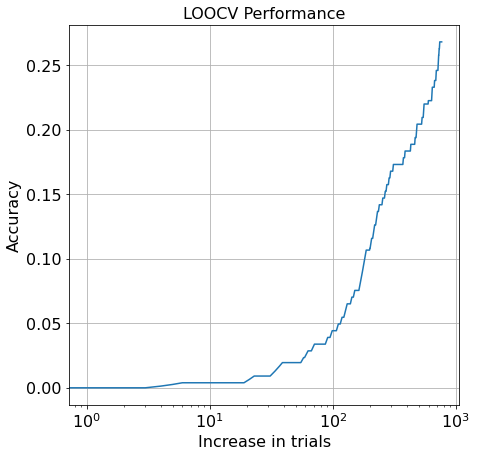

In [91]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [92]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.2682291666666667


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance to 27% from 19% but still the model is worst performed

In [0]:
scores_qda_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_qda_h=QuadraticDiscriminantAnalysis()
classifier_qda_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_qda_h=classifier_qda_h.predict(X_test_scaled)
score_qda_h=accuracy_score(y_pred_qda_h,Y_test['Heating Load'])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [96]:
cm_qda_h = confusion_matrix(Y_test['Heating Load'], y_pred_qda_h)
print(cm_qda_h)

[[ 2  1  6  0  0  0  0  0]
 [ 1 13 35  0  0  0  0  0]
 [ 0  3 12  0  2  0  0  0]
 [ 0  0  1  0 12  0  0  0]
 [ 0  0  5  0 18  0  0  0]
 [ 0  0  6  0 12  0  0  0]
 [ 0  0 15  0  4  0  0  0]
 [ 0  0  6  0  0  0  0  0]]


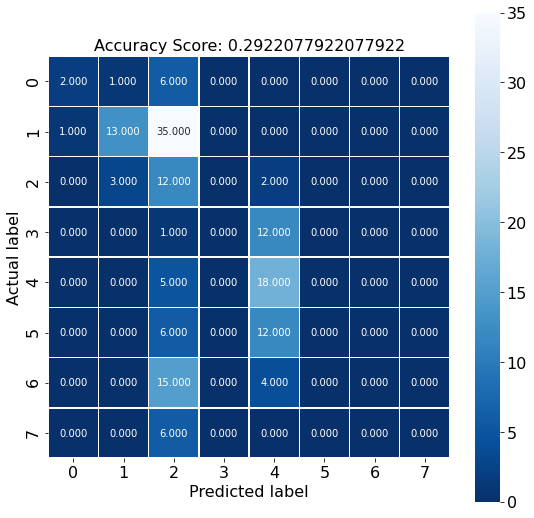

In [97]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_qda_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_qda_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
scores_qda_h_pca=score_qda_h

## KNN

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [100]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [102]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [103]:
classifier_knn_h=KNeighborsClassifier(n_neighbors=1)
classifier_knn_h.fit(X_train_scaled,Y_train['Heating Load'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred_knn_h=classifier_knn_h.predict(X_test_scaled)

In [105]:
score_knn_h=accuracy_score(y_pred_knn_h,Y_test['Heating Load'])
print('Performance of KNN Regression is: ',score_knn_h)

Performance of KNN Regression is:  0.9025974025974026


In [0]:
score_knn_h_n=score_knn_h

In [107]:
cm_knn_h = confusion_matrix(Y_test['Heating Load'], y_pred_knn_h)
print(cm_knn_h)

[[ 7  2  0  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  0]
 [ 0  1 15  1  0  0  0  0]
 [ 0  0  0 10  3  0  0  0]
 [ 0  0  0  1 22  0  0  0]
 [ 0  0  0  1  0 16  1  0]
 [ 0  0  0  0  0  2 17  0]
 [ 0  0  0  0  0  0  2  4]]


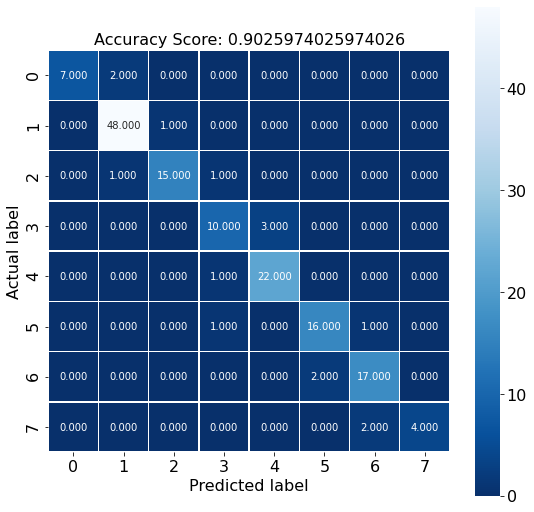

In [108]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_knn_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [109]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_knn_h=KNeighborsClassifier(n_neighbors=1)
  classifier_knn_h.fit(X_train_scaled,y_train)
  y_pred_knn_h=classifier_knn_h.predict(X_test_scaled)
  score_knn_h=accuracy_score(y_pred_knn_h,y_test)
  temp+=score_knn_h
  scores.append(temp/features.shape[0])

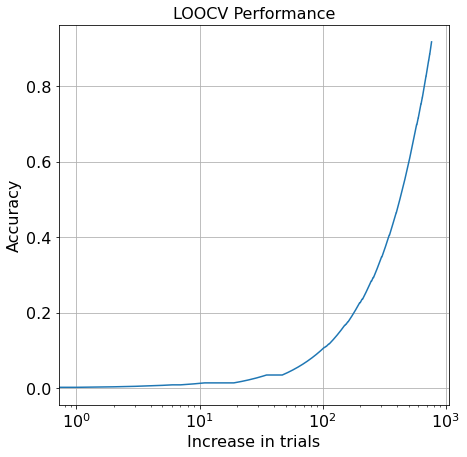

In [111]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [112]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.9166666666666666


The performance of the model increased from 84% to 91% which is very good with using LOO cross validation technique

In [0]:
scores_knn_h_loo=scores[len(scores)-1]

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [115]:
features_updated

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [116]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_knn_h=KNeighborsClassifier()
  classifier_knn_h.fit(X_train_scaled,y_train)
  y_pred_knn_h=classifier_knn_h.predict(X_test_scaled)
  score_knn_h=accuracy_score(y_pred_knn_h,y_test)
  temp+=score_knn_h
  scores.append(temp/features.shape[0])

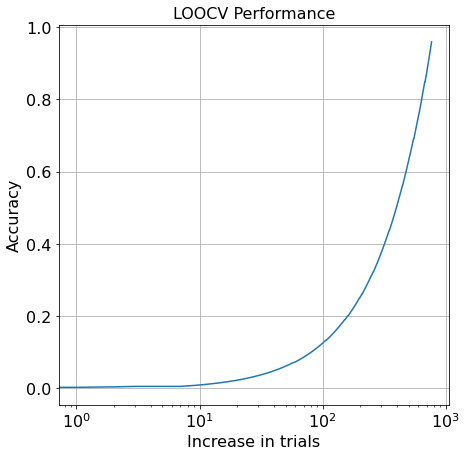

In [118]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [119]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.9596354166666666


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased to 95% which is the best performance

In [0]:
scores_knn_h_frloo=scores[len(scores)-1]

#### PCA

In [121]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [123]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [124]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_knn_h=KNeighborsClassifier()
  classifier_knn_h.fit(X_train_scaled,y_train)
  y_pred_knn_h=classifier_knn_h.predict(X_test_scaled)
  score_knn_h=accuracy_score(y_pred_knn_h,y_test)
  temp+=score_knn_h
  scores.append(temp/features.shape[0])

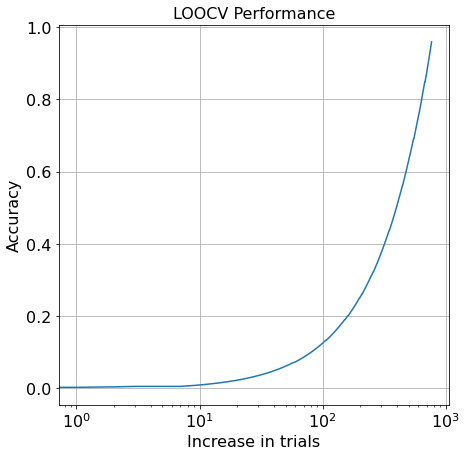

In [126]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [127]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.9596354166666666


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance to 96% from 91%

In [0]:
scores_knn_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_knn_h=KNeighborsClassifier(n_neighbors=3)
classifier_knn_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_knn_h=classifier_knn_h.predict(X_test_scaled)
score_knn_h=accuracy_score(y_pred_knn_h,Y_test['Heating Load'])

In [131]:
cm_knn_h = confusion_matrix(Y_test['Heating Load'], y_pred_knn_h)
print(cm_knn_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  0 16  1  0  0  0  0]
 [ 0  0  0 11  2  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  0 18  1]
 [ 0  0  0  0  0  0  2  4]]


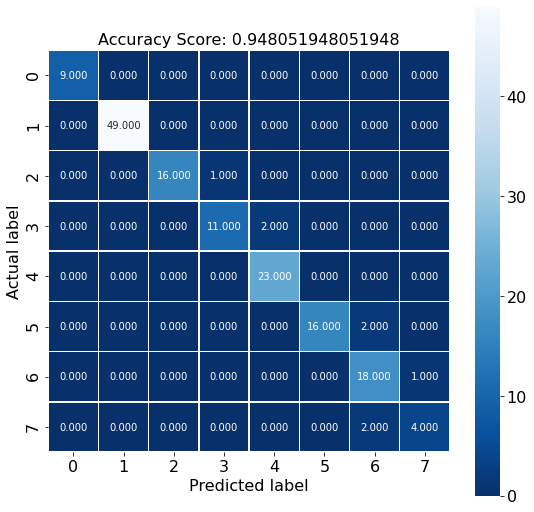

In [132]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_knn_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
scores_knn_h_pca=score_knn_h

## SVM

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [135]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [137]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [138]:
classifier_svm_h=svm.SVC()
classifier_svm_h.fit(X_train_scaled,Y_train['Heating Load'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm_h=classifier_svm_h.predict(X_test_scaled)

In [140]:
score_svm_h=accuracy_score(y_pred_svm_h,Y_test['Heating Load'])
print('Performance of KNN Regression is: ',score_svm_h)

Performance of KNN Regression is:  0.7662337662337663


In [0]:
score_svm_h_n=score_svm_h

In [142]:
cm_svm_h = confusion_matrix(Y_test['Heating Load'], y_pred_svm_h)
print(cm_svm_h)

[[ 7  2  0  0  0  0  0  0]
 [ 2 44  3  0  0  0  0  0]
 [ 0  6 11  0  0  0  0  0]
 [ 0  0  0  9  3  1  0  0]
 [ 0  0  0  5 18  0  0  0]
 [ 0  0  0  0  3 13  2  0]
 [ 0  0  0  2  0  4 13  0]
 [ 0  0  0  0  0  0  3  3]]


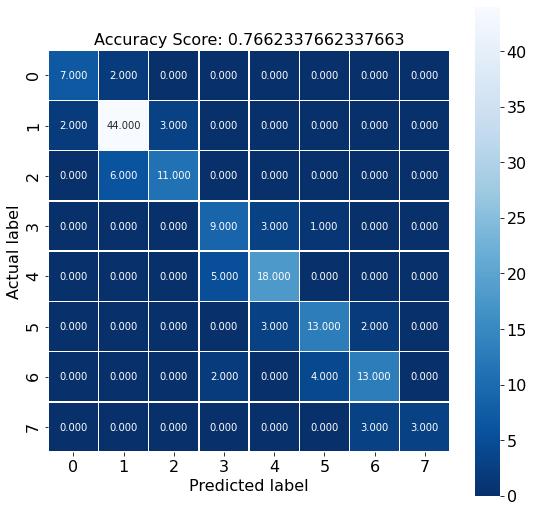

In [143]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_svm_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_svm_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [144]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_svm_h=svm.SVC()
  classifier_svm_h.fit(X_train_scaled,y_train)
  y_pred_svm_h=classifier_svm_h.predict(X_test_scaled)
  score_svm_h=accuracy_score(y_pred_svm_h,y_test)
  temp+=score_svm_h
  scores.append(temp/features.shape[0])

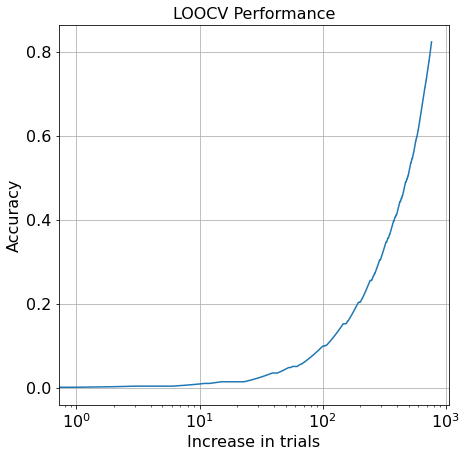

In [146]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [147]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.8229166666666666


In [0]:
score_svm_h_loo=scores[len(scores)-1]

The performance of the model increased from 76% to 82% which is very good with using LOO cross validation technique

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [150]:
features_updated

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [151]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_svm_h=svm.SVC()
  classifier_svm_h.fit(X_train_scaled,y_train)
  y_pred_svm_h=classifier_svm_h.predict(X_test_scaled)
  score_svm_h=accuracy_score(y_pred_svm_h,y_test)
  temp+=score_svm_h
  scores.append(temp/features.shape[0])

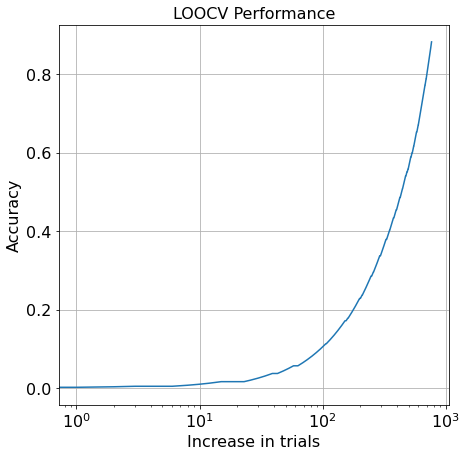

In [153]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [154]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.8815104166666666


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased to 88%

In [0]:
score_svm_h_frloo=scores[len(scores)-1]

#### PCA

In [156]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [158]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [159]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_svm_h=svm.SVC()
  classifier_svm_h.fit(X_train_scaled,y_train)
  y_pred_svm_h=classifier_svm_h.predict(X_test_scaled)
  score_svm_h=accuracy_score(y_pred_svm_h,y_test)
  temp+=score_svm_h
  scores.append(temp/features.shape[0])

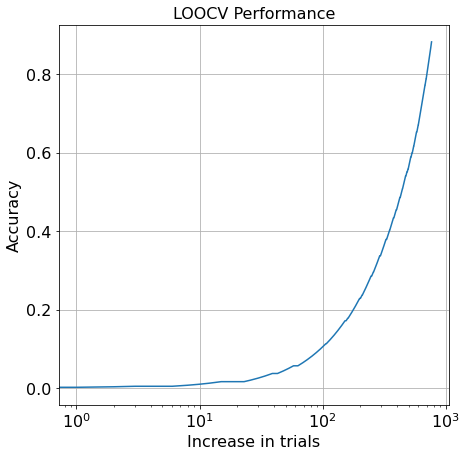

In [161]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [162]:
print('The performance of the Logistic Regression for Heating Load is: ',scores[len(scores)-1])

The performance of the Logistic Regression for Heating Load is:  0.8815104166666666


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance

In [0]:
score_svm_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_svm_h=svm.SVC()
classifier_svm_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_svm_h=classifier_svm_h.predict(X_test_scaled)
score_svm_h=accuracy_score(y_pred_svm_h,Y_test['Heating Load'])

In [166]:
cm_svm_h = confusion_matrix(Y_test['Heating Load'], y_pred_svm_h)
print(cm_svm_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  4 13  0  0  0  0  0]
 [ 0  0  0  8  4  1  0  0]
 [ 0  0  0  6 17  0  0  0]
 [ 0  0  0  0  2 14  2  0]
 [ 0  0  0  0  0  4 15  0]
 [ 0  0  0  0  0  0  3  3]]


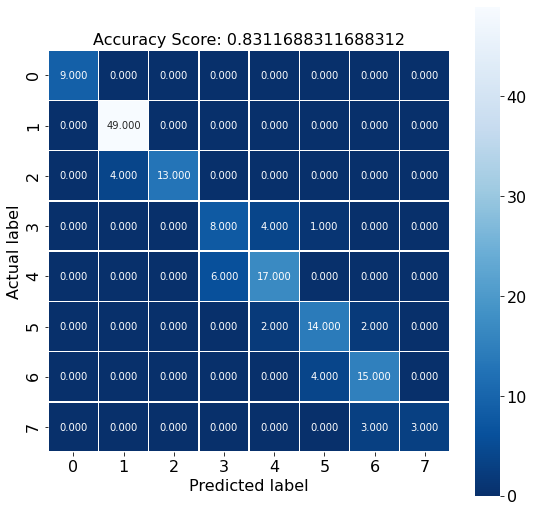

In [167]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_svm_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_svm_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
score_svm_h_pca=score_svm_h

## Decision Tree

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [170]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [172]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [173]:
classifier_dt_h=tree.DecisionTreeClassifier()
classifier_dt_h.fit(X_train_scaled,Y_train['Heating Load'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_dt_h=classifier_dt_h.predict(X_test_scaled)

In [175]:
score_dt_h=accuracy_score(y_pred_dt_h,Y_test['Heating Load'])
print('Performance of KNN Regression is: ',score_dt_h)

Performance of KNN Regression is:  0.9025974025974026


In [0]:
score_dt_h_n=score_dt_h

In [177]:
cm_dt_h = confusion_matrix(Y_test['Heating Load'], y_pred_dt_h)
print(cm_dt_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  4 12  1  0  0  0  0]
 [ 0  0  0 10  3  0  0  0]
 [ 0  0  0  1 22  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  2 17  0]
 [ 0  0  0  0  0  0  2  4]]


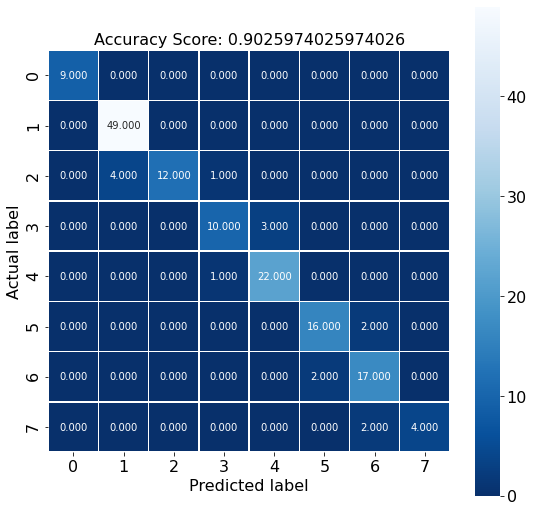

In [178]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_dt_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [179]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_dt_h=tree.DecisionTreeClassifier()
  classifier_dt_h.fit(X_train_scaled,y_train)
  y_pred_dt_h=classifier_dt_h.predict(X_test_scaled)
  score_dt_h=accuracy_score(y_pred_dt_h,y_test)
  temp+=score_dt_h
  scores.append(temp/features.shape[0])

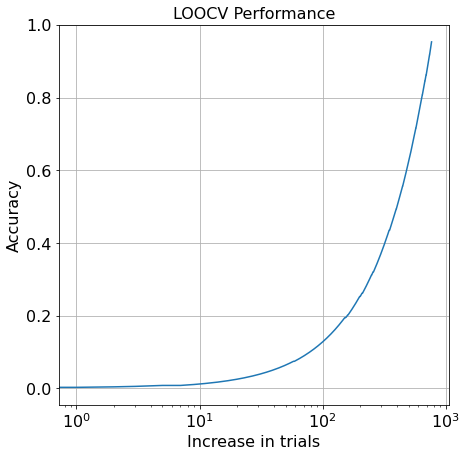

In [181]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [182]:
print('The performance of the Decision Tree for Heating Load is: ',scores[len(scores)-1])

The performance of the Decision Tree for Heating Load is:  0.953125


The performance of the model increased from 76% to 82% which is very good with using LOO cross validation technique

In [0]:
score_dt_h_loo=scores[len(scores)-1]

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [185]:
features_updated

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [186]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_dt_h=tree.DecisionTreeClassifier()
  classifier_dt_h.fit(X_train_scaled,y_train)
  y_pred_dt_h=classifier_dt_h.predict(X_test_scaled)
  score_dt_h=accuracy_score(y_pred_dt_h,y_test)
  temp+=score_dt_h
  scores.append(temp/features.shape[0])

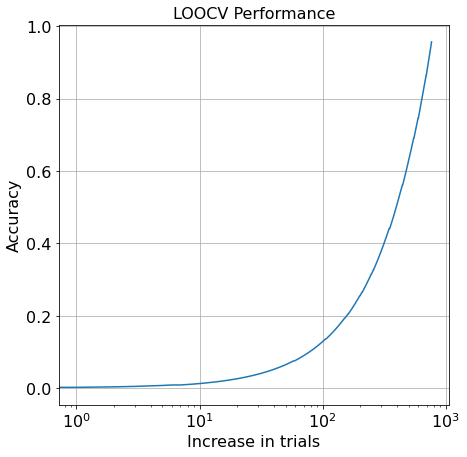

In [188]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [189]:
print('The performance of the Decision Tree for Heating Load is: ',scores[len(scores)-1])

The performance of the Decision Tree for Heating Load is:  0.95703125


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased

In [0]:
score_dt_h_frloo=scores[len(scores)-1]

#### PCA

In [191]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [193]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [194]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_dt_h=tree.DecisionTreeClassifier()
  classifier_dt_h.fit(X_train_scaled,y_train)
  y_pred_dt_h=classifier_dt_h.predict(X_test_scaled)
  score_dt_h=accuracy_score(y_pred_dt_h,y_test)
  temp+=score_dt_h
  scores.append(temp/features.shape[0])

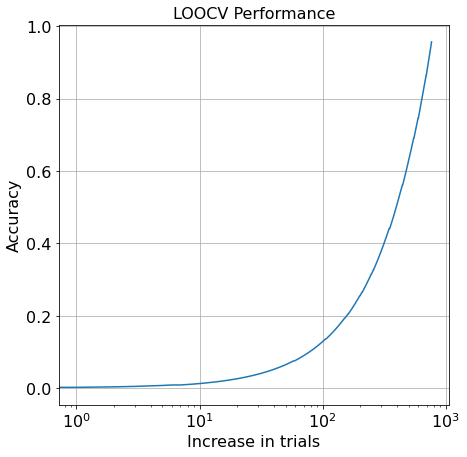

In [196]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [197]:
print('The performance of the Decision Tree for Heating Load is: ',scores[len(scores)-1])

The performance of the Decision Tree for Heating Load is:  0.95703125


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance

In [0]:
score_dt_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_dt_h=tree.DecisionTreeClassifier()
classifier_dt_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_dt_h=classifier_dt_h.predict(X_test_scaled)
score_dt_h=accuracy_score(y_pred_dt_h,Y_test['Heating Load'])

In [201]:
cm_dt_h = confusion_matrix(Y_test['Heating Load'], y_pred_dt_h)
print(cm_dt_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  0 16  1  0  0  0  0]
 [ 0  0  0 11  2  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  3  3]]


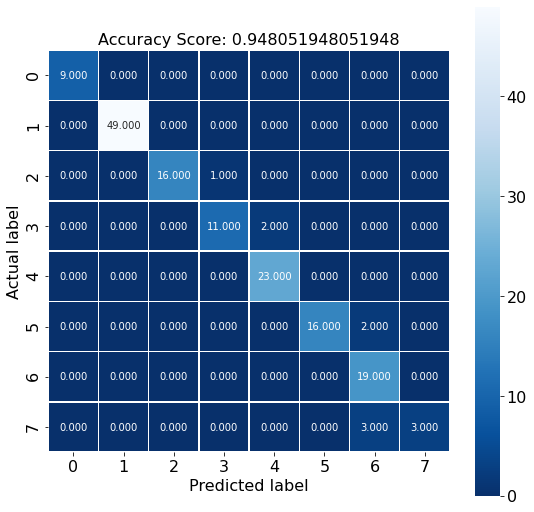

In [202]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_dt_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_dt_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
score_dt_h_pca=score_dt_h

## Random Forest

### Heating Load

In [0]:
#Split the data into training & testing
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [205]:
#Scale the dataset
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Transform the dataset
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [207]:
X_train_scaled

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [208]:
classifier_rf_h=RandomForestClassifier(n_estimators=100)
classifier_rf_h.fit(X_train_scaled,Y_train['Heating Load'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rf_h=classifier_rf_h.predict(X_test_scaled)

In [210]:
score_rf_h=accuracy_score(y_pred_rf_h,Y_test['Heating Load'])
print('Performance of Random Forest is: ',score_rf_h)

Performance of Random Forest is:  0.8961038961038961


In [0]:
score_rf_h_n=score_rf_h

In [212]:
cm_rf_h = confusion_matrix(Y_test['Heating Load'], y_pred_rf_h)
print(cm_rf_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  4 12  1  0  0  0  0]
 [ 0  0  0 10  3  0  0  0]
 [ 0  0  0  1 22  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  2 16  1]
 [ 0  0  0  0  0  0  2  4]]


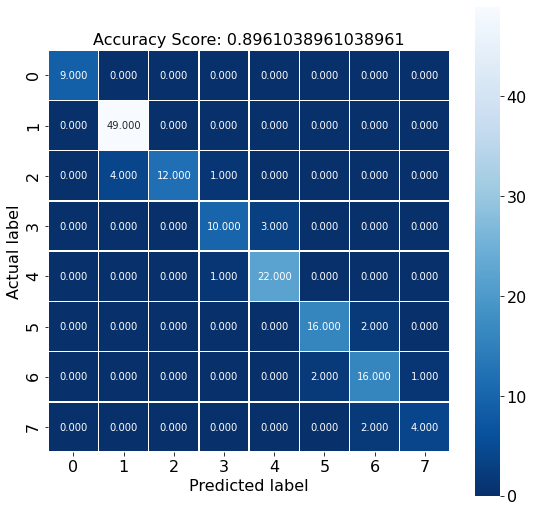

In [213]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_rf_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

#### LOOCV

In [214]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

614

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features):
  X_train, X_test = features.values[train_index], features.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_rf_h=RandomForestClassifier(n_estimators=100)
  classifier_rf_h.fit(X_train_scaled,y_train)
  y_pred_rf_h=classifier_rf_h.predict(X_test_scaled)
  score_rf_h=accuracy_score(y_pred_rf_h,y_test)
  temp+=score_rf_h
  scores.append(temp/features.shape[0])

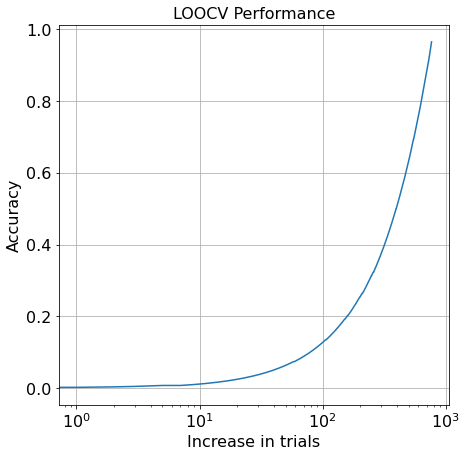

In [216]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [217]:
print('The performance of the Random Forest for Heating Load is: ',scores[len(scores)-1])

The performance of the Random Forest for Heating Load is:  0.96484375


In [0]:
score_rf_h_loo=scores[len(scores)-1]

#### Feature Reduction

In [0]:
features_updated=features.drop(['Orientation'],axis=1)

In [220]:
features_updated  

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.98,514.50,294.00,110.25,7.00,0.00,0
1,0.98,514.50,294.00,110.25,7.00,0.00,0
2,0.98,514.50,294.00,110.25,7.00,0.00,0
3,0.98,514.50,294.00,110.25,7.00,0.00,0
4,0.90,563.50,318.50,122.50,7.00,0.00,0
...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,0.40,5
764,0.62,808.50,367.50,220.50,3.50,0.40,5
765,0.62,808.50,367.50,220.50,3.50,0.40,5
766,0.62,808.50,367.50,220.50,3.50,0.40,5


In [221]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

767

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_updated):
  X_train, X_test = features_updated.values[train_index], features_updated.values[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_rf_h=RandomForestClassifier(n_estimators=100)
  classifier_rf_h.fit(X_train_scaled,y_train)
  y_pred_rf_h=classifier_rf_h.predict(X_test_scaled)
  score_rf_h=accuracy_score(y_pred_rf_h,y_test)
  temp+=score_rf_h
  scores.append(temp/features.shape[0])

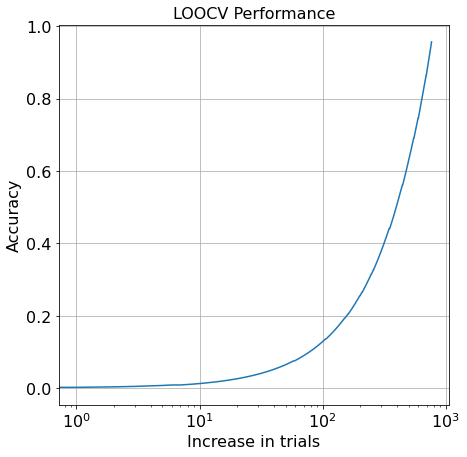

In [223]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [224]:
print('The performance of the Random Forest for Heating Load is: ',scores[len(scores)-1])

The performance of the Random Forest for Heating Load is:  0.95703125


With removing one feature (Orientation) from the dataset which is having very less correlational value, the perfomance of the LOOCV Model has increased

In [0]:
score_rf_h_frloo=scores[len(scores)-1]

#### PCA

In [226]:
pca = PCA(n_components=features_updated.shape[1])
pca.fit(features_updated)
print(pca.explained_variance_ratio_)

[8.07118710e-01 1.92660110e-01 2.05526780e-04 1.41975630e-05
 1.44663759e-06 9.05239454e-09 7.23519959e-32]


The PCA variance ratio provides that only two input features are capable to predict the output

In [0]:
pca = PCA(n_components=6)
features_pca=pca.fit_transform(features)

In [228]:
features_pca

array([[ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -1.50000000e+00,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
        -5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       [ 1.71647343e+02, -1.60408474e+01,  2.81633988e+00,
         5.00000000e-01,  7.58471832e-01, -1.82531040e-01],
       ...,
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
        -5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         5.00000000e-01,  8.63594770e-02,  1.25304747e-01],
       [-1.45097670e+02,  4.46043267e+01, -2.19017958e+00,
         1.50000000e+00,  8.63594770e-02,  1.25304747e-01]])

In [229]:
loo = LeaveOneOut()
loo.get_n_splits(features_pca)

768

In [0]:
scores = []
temp=0
i=0
for train_index, test_index in loo.split(features_pca):
  X_train, X_test = features_pca[train_index], features_pca[test_index]
  y_train, y_test = labels.values[train_index][:,0], labels.values[test_index][:,0]
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)
  classifier_rf_h=RandomForestClassifier(n_estimators=100)
  classifier_rf_h.fit(X_train_scaled,y_train)
  y_pred_rf_h=classifier_rf_h.predict(X_test_scaled)
  score_rf_h=accuracy_score(y_pred_rf_h,y_test)
  temp+=score_rf_h
  scores.append(temp/features.shape[0])

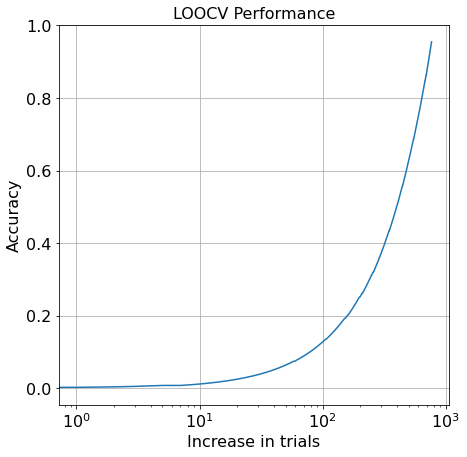

In [231]:
plt.figure(figsize=(7,7))
plt.plot(range(features.shape[0]),scores)
plt.xlabel('Increase in trials',size=16)
plt.ylabel('Accuracy',size=16)
plt.grid()
plt.xscale('log')
plt.title('LOOCV Performance',size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [232]:
print('The performance of the Random Forest for Heating Load is: ',scores[len(scores)-1])

The performance of the Random Forest for Heating Load is:  0.9544270833333334


Converting the features space to six features using Principle Component Analysis (PCA) helps to improve the LOOCV performance

In [0]:
score_rf_h_pcaloo=scores[len(scores)-1]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(features_updated,labels,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier_rf_h=RandomForestClassifier(n_estimators=100)
classifier_rf_h.fit(X_train_scaled,Y_train['Heating Load'])
y_pred_rf_h=classifier_rf_h.predict(X_test_scaled)
score_rf_h=accuracy_score(y_pred_rf_h,Y_test['Heating Load'])

In [236]:
cm_rf_h = confusion_matrix(Y_test['Heating Load'], y_pred_rf_h)
print(cm_rf_h)

[[ 9  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0]
 [ 0  0 16  1  0  0  0  0]
 [ 0  0  0 11  2  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  0 18  1]
 [ 0  0  0  0  0  0  2  4]]


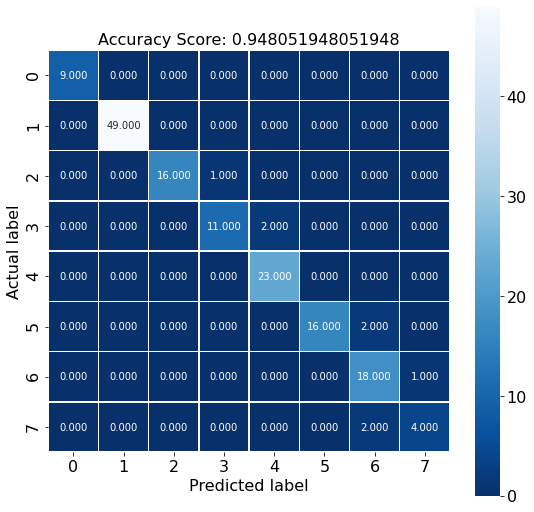

In [237]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_rf_h, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label',size=16)
plt.xlabel('Predicted label',size=16)
all_sample_title = 'Accuracy Score: {0}'.format(score_rf_h)
plt.title(all_sample_title, size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.show()

In [0]:
score_rf_h_pca=score_rf_h

## Model Comparison

In [0]:
xlabel=['Normal','With LOOCV','With dropping feature','PCA + LOOCV','Only PCA']
log_h=[score_log_h_n,scores_log_h_loo,scores_log_h_frloo,scores_log_h_pcaloo,score_log_h_pca]
qda_h=[score_qda_h_n,scores_qda_h_loo,scores_qda_h_frloo,scores_qda_h_pcaloo,scores_qda_h_pca]
knn_h=[score_knn_h_n,scores_knn_h_loo,scores_knn_h_frloo,scores_knn_h_pcaloo,scores_knn_h_pca]
svm_h=[score_svm_h_n,score_svm_h_loo,score_svm_h_frloo,score_svm_h_pcaloo,score_svm_h_pca]
dt_h=[score_dt_h_n,score_dt_h_loo,score_dt_h_frloo,score_dt_h_pcaloo,score_dt_h_pca]
rf_h=[score_rf_h_n,score_rf_h_loo,score_rf_h_frloo,score_rf_h_pcaloo,score_rf_h_pca]

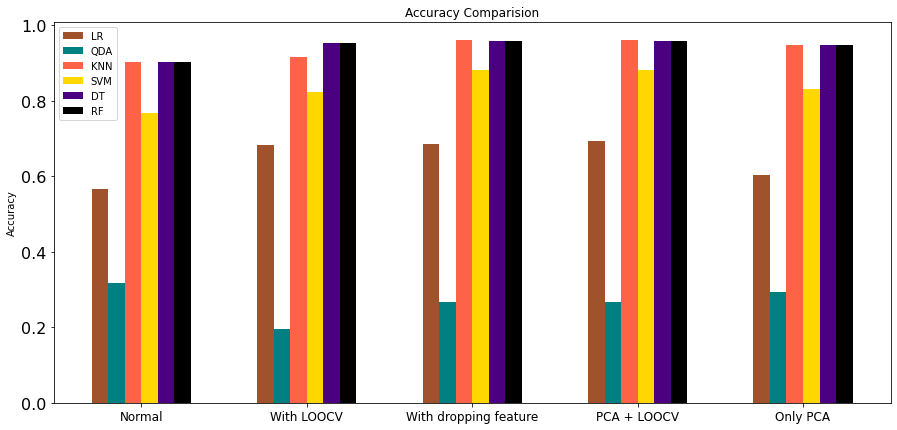

In [240]:
plt.figure(figsize=(15,7))
x=np.arange(len(xlabel))
plt.xticks(x,xlabel,size=12)
plt.ylabel('Accuracy')
plt.bar(x-0.25,log_h,color='sienna',width=0.1,label='LR')
plt.bar(x-0.15,qda_h,color='teal',width=0.1,label='QDA')
plt.bar(x-0.05,knn_h,color='tomato',width=0.1,label='KNN')
plt.bar(x+0.05,svm_h,color='gold',width=0.1,label='SVM')
plt.bar(x+0.15,dt_h,color='indigo',width=0.1,label='DT')
plt.bar(x+0.25,dt_h,color='black',width=0.1,label='RF')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Accuracy Comparision',size=12)
plt.legend()
plt.show()

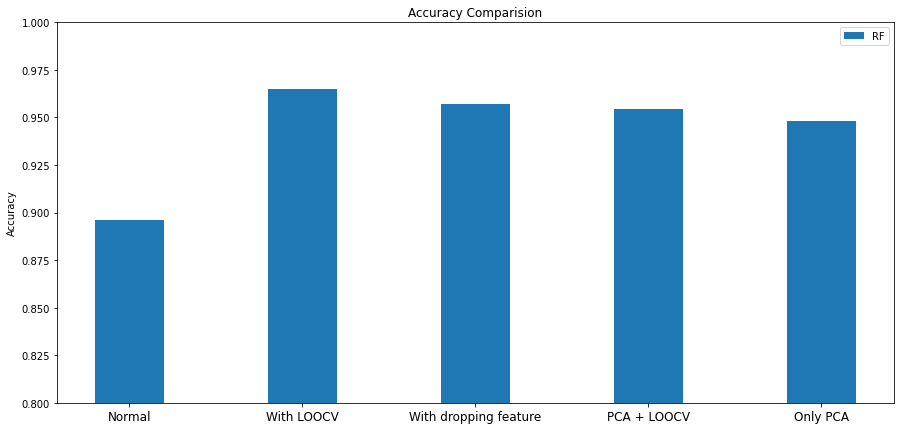

In [241]:
plt.figure(figsize=(15,7))
x=np.arange(len(xlabel))
plt.xticks(x,xlabel,size=12)
plt.ylabel('Accuracy')
plt.bar(x,rf_h,width=0.4,label='RF')
plt.ylim(0.8,1)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Accuracy Comparision',size=12)
plt.legend()
plt.show()